### Synopsis
This code plots the g2 value at the delay point closest to $\Delta$t= 0.1 s as a function of temperature, for all sample conditions.   
Need to run the analysis code first to generate the `checkpoint.pickle` file that contains the averaged g2s.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit

import itertools
marker = itertools.cycle(('+', 's', '*')) 


### Loading data from `.pickle` file

In [2]:

with open('checkpoint.pickle', 'rb') as f:  # 'rb' for binary read mode
    avg_H02 = pickle.load(f)  # Load the object from the file
    avg_H04 = pickle.load(f)
    avg_H06 = pickle.load(f)
    t_el = pickle.load(f)
    ql_dyn = pickle.load(f)
    ql_sta = pickle.load(f)


### Initializing fonts in `Matplotlib`

In [3]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.size'] = 8
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "Times New Roman"


In [4]:

diff = 0

n_H02 = 8+diff
contrast = 0.19   # originally at 0.19 
_ = avg_H02[n_H02]["g2"]
g2_H02 = (_[:,0]-1)/contrast
_ = avg_H02[n_H02]["g2_err"]
g2_err_H02 = _[:,0]/contrast
saxs_1d_H02 = avg_H02[n_H02]["saxs_1d"]
temp_H02 = 31.0986

n_H04 = 10+diff
contrast = 0.195 # originally at 0.195
_ = avg_H04[n_H04]["g2"]
g2_H04 = (_[:,0]-1)/contrast
_ = avg_H04[n_H04]["g2_err"]
g2_err_H04 = _[:,0]/contrast
saxs_1d_H04 = avg_H04[n_H04]["saxs_1d"]
temp_H06 = 31.2451

n_H06 = 17+diff
contrast = 0.135  # originally at 0.135
_ = avg_H06[n_H06]["g2"]
g2_H06 = (_[:,0]-1)/contrast
_ = avg_H06[n_H06]["g2_err"]
g2_err_H06 = _[:,0]/contrast
saxs_1d_H06 = avg_H06[n_H06]["saxs_1d"]
temp_H06 = 31.2198


In [5]:


def double_exp(x, a1, tau1, tau2, p1, p2):
    # return amplitude * np.sin(frequency * x + phase) + offset
    return (a1*np.exp(-(x/tau1)**p1) + (1-a1)*np.exp(-(x/tau2)**p2))**2

x_fit = np.logspace(np.log10(2e-5), np.log10(2), 100) 

bounds = ([0, 1e-6, 1e-6, 0, 0], [1, 1e3, 1e3, 2, 2]) 
popt, pcov = curve_fit(double_exp, t_el, g2_H02, p0=[0.5, 1e-3, 1, 1, 1], bounds=bounds, sigma=g2_err_H02) 
g2_H02_fit = double_exp(x_fit, *popt)
H02_fit = popt
H02_fit_err = np.sqrt(np.diag(pcov))
print(f"H02, a1={H02_fit[0]:.3f}\u00B1{H02_fit_err[0]:.3f}, \
        τ1={H02_fit[1]:.4f}\u00B1{H02_fit_err[1]:.4f}, \
        τ2={H02_fit[2]:.2f}\u00B1{H02_fit_err[2]:.2f}, \
        p1={H02_fit[3]:.4f}\u00B1{H02_fit_err[3]:.4f}, \
        p2={H02_fit[4]:.2f}\u00B1{H02_fit_err[4]:.2f}")

bounds = ([0, 1e-6, 1e-6, 0, 0], [1, 1e3, 1e3, 3, 3]) 
popt, pcov = curve_fit(double_exp, t_el, g2_H04, p0=[0.5, 1e-3, 1, 1, 1], bounds=bounds, sigma=g2_err_H02) 
g2_H04_fit = double_exp(x_fit, *popt)
H04_fit = popt
H04_fit_err = np.sqrt(np.diag(pcov))
print(f"H04, a1={H04_fit[0]:.3f}\u00B1{H04_fit_err[0]:.3f}, \
        τ1={H04_fit[1]:.4f}\u00B1{H04_fit_err[1]:.4f}, \
        τ2={H04_fit[2]:.2f}\u00B1{H04_fit_err[2]:.2f}, \
        p1={H04_fit[3]:.4f}\u00B1{H04_fit_err[3]:.4f}, \
        p2={H04_fit[4]:.2f}\u00B1{H04_fit_err[4]:.2f}")

bounds = ([0, 1e-6, 1e-6, 0, 0], [1, 1e3, 1e3, 3, 3]) 
popt, pcov = curve_fit(double_exp, t_el, g2_H06, p0=[0.5, 1e-3, 1, 1, 1], bounds=bounds, sigma=g2_err_H02)  
g2_H06_fit = double_exp(x_fit, *popt)
H06_fit = popt
H06_fit_err = np.sqrt(np.diag(pcov))
print(f"H06, a1={H06_fit[0]:.3f}\u00B1{H06_fit_err[0]:.3f}, \
        τ1={H06_fit[1]:.4f}\u00B1{H06_fit_err[1]:.4f}, \
        τ2={H06_fit[2]:.2f}\u00B1{H06_fit_err[2]:.2f}, \
        p1={H06_fit[3]:.4f}\u00B1{H06_fit_err[3]:.4f}, \
        p2={H06_fit[4]:.2f}\u00B1{H06_fit_err[4]:.2f}")



H02, a1=0.337±0.006,         τ1=0.0111±0.0009,         τ2=3.42±0.10,         p1=0.4458±0.0231,         p2=1.36±0.07
H04, a1=0.284±0.003,         τ1=0.0013±0.0001,         τ2=83.86±16.42,         p1=0.5003±0.0304,         p2=0.50±0.03
H06, a1=0.265±0.004,         τ1=0.0012±0.0001,         τ2=42.67±5.46,         p1=0.6399±0.0593,         p2=0.51±0.03


<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid escape 

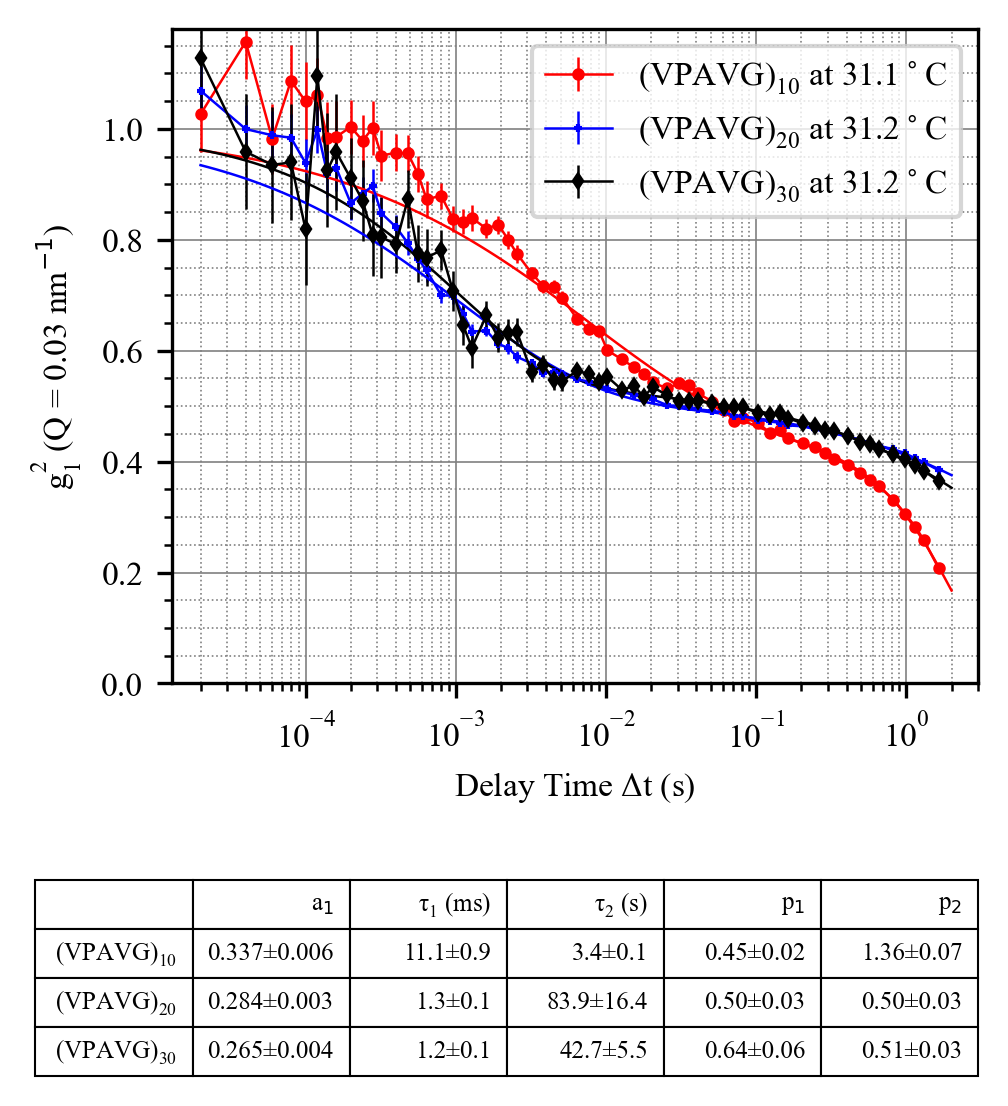

In [6]:

fig, ax = plt.subplots(1, 1, figsize=(3.4, 4.5))  # Match the figure size to the first script
ax.errorbar(t_el, g2_H02, g2_err_H02, marker='o', color='r', ms=2, lw=0.6, 
            label='(VPAVG)$\mathdefault{_{10}}$ at 31.1$^\circ$C')
ax.errorbar(t_el, g2_H04, g2_err_H04, marker='+', color='b', ms=2, lw=0.6, 
            label='(VPAVG)$\mathdefault{_{20}}$ at 31.2$^\circ$C')
ax.errorbar(t_el, g2_H06, g2_err_H06, marker='d', color='k', ms=2, lw=0.6, 
            label='(VPAVG)$\mathdefault{_{30}}$ at 31.2$^\circ$C')
ax.plot(x_fit, g2_H02_fit, '-', color='r', linewidth=0.6)  # Thinner line
ax.plot(x_fit, g2_H04_fit, '-', color='b', linewidth=0.6)  # Thinner line
ax.plot(x_fit, g2_H06_fit, '-', color='k', linewidth=0.6)  # Thinner line
ax.set_xscale('log')
ax.set_ylim(0, 1.18)
ax.set_xlim(0.000013,3)  # Adjust x-axis limits to add white space
ax.set_xlabel('Delay Time $\mathdefault{\Delta}$t (s)', fontname="Times New Roman")
ax.set_ylabel('$\mathdefault{g_1^2}$ (Q = 0.03 nm$^{-1}$)', fontname="Times New Roman")
plt.legend(fontsize=8)

# Set minor ticks and grid, matching the first script
ax.grid(which='major', linestyle='-', linewidth='0.4', color='gray')
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.4', color='gray')

# Adjust minor ticks for log scale
ax.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.linspace(0.1, 1.0, 10), numticks=12))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))

# Add dashed black vertical line at Δt = 0.1 s
# ax.axvline(x=0.1, color='black', linestyle='--', linewidth=1)

data = [
        ['','a$_1$','$\mathdefault{τ_1}$ (ms)','$\mathdefault{τ_2}$ (s)','p$_1$','p$_2$'],
        ['(VPAVG)$\mathdefault{_{10}}$', \
         f"{H02_fit[0]:.3f}\u00B1{H02_fit_err[0]:.3f}", \
         f"{H02_fit[1]*1e3:.1f}\u00B1{H02_fit_err[1]*1e3:.1f}", \
         f"{H02_fit[2]:.1f}\u00B1{H02_fit_err[2]:.1f}", \
         f"{H02_fit[3]:.2f}\u00B1{H02_fit_err[3]:.2f}", \
         f"{H02_fit[4]:.2f}\u00B1{H02_fit_err[4]:.2f}"],\
        ['(VPAVG)$\mathdefault{_{20}}$', \
         f"{H04_fit[0]:.3f}\u00B1{H04_fit_err[0]:.3f}", \
         f"{H04_fit[1]*1e3:.1f}\u00B1{H04_fit_err[1]*1e3:.1f}", \
         f"{H04_fit[2]:.1f}\u00B1{H04_fit_err[2]:.1f}", \
         f"{H04_fit[3]:.2f}\u00B1{H04_fit_err[3]:.2f}", \
         f"{H04_fit[4]:.2f}\u00B1{H04_fit_err[4]:.2f}"],\
        ['(VPAVG)$\mathdefault{_{30}}$', \
         f"{H06_fit[0]:.3f}\u00B1{H06_fit_err[0]:.3f}", \
         f"{H06_fit[1]*1e3:.1f}\u00B1{H06_fit_err[1]*1e3:.1f}", \
         f"{H06_fit[2]:.1f}\u00B1{H06_fit_err[2]:.1f}", \
         f"{H06_fit[3]:.2f}\u00B1{H06_fit_err[3]:.2f}", \
         f"{H06_fit[4]:.2f}\u00B1{H06_fit_err[4]:.2f}"]\
        ]
        
table = ax.table(cellText=data, loc='bottom', bbox=[-0.17, -0.6, 1.17, 0.3])  # xstart, ystart, xsize, ysize
table.auto_set_font_size(False)
table.set_fontsize(6)

for cell in table.get_celld().values():
    cell.set_linewidth(0.5)  # Adjust the line width as desired

plt.tight_layout()
plt.savefig('g2_overlap.pdf', bbox_inches='tight')
plt.show()





<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_1038113/769343389.py:5: SyntaxWarning: invalid escape sequence '\m'
  label='(VPAVG)$\mathdefault{_{10}}$ at 31.1$^\circ$C')
/tmp/ipykernel_1038113/769343389.py:7: SyntaxWarning: invalid escape sequence '\m'
  label='(VPAVG)$\mathdefault{_{20}}$ at 31.1$^\circ$C')
/tmp/ipykernel_1038113/769343389.py:9: SyntaxWarning: invalid escape sequence '\m'
  label='(VPAVG)$\mathdefault{_{30}}$ at 31.1$^\circ$C')
/tmp/ipykernel_1038113/769343389.py:11: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('q ($\mathdefault{nm^{-1}}$)')


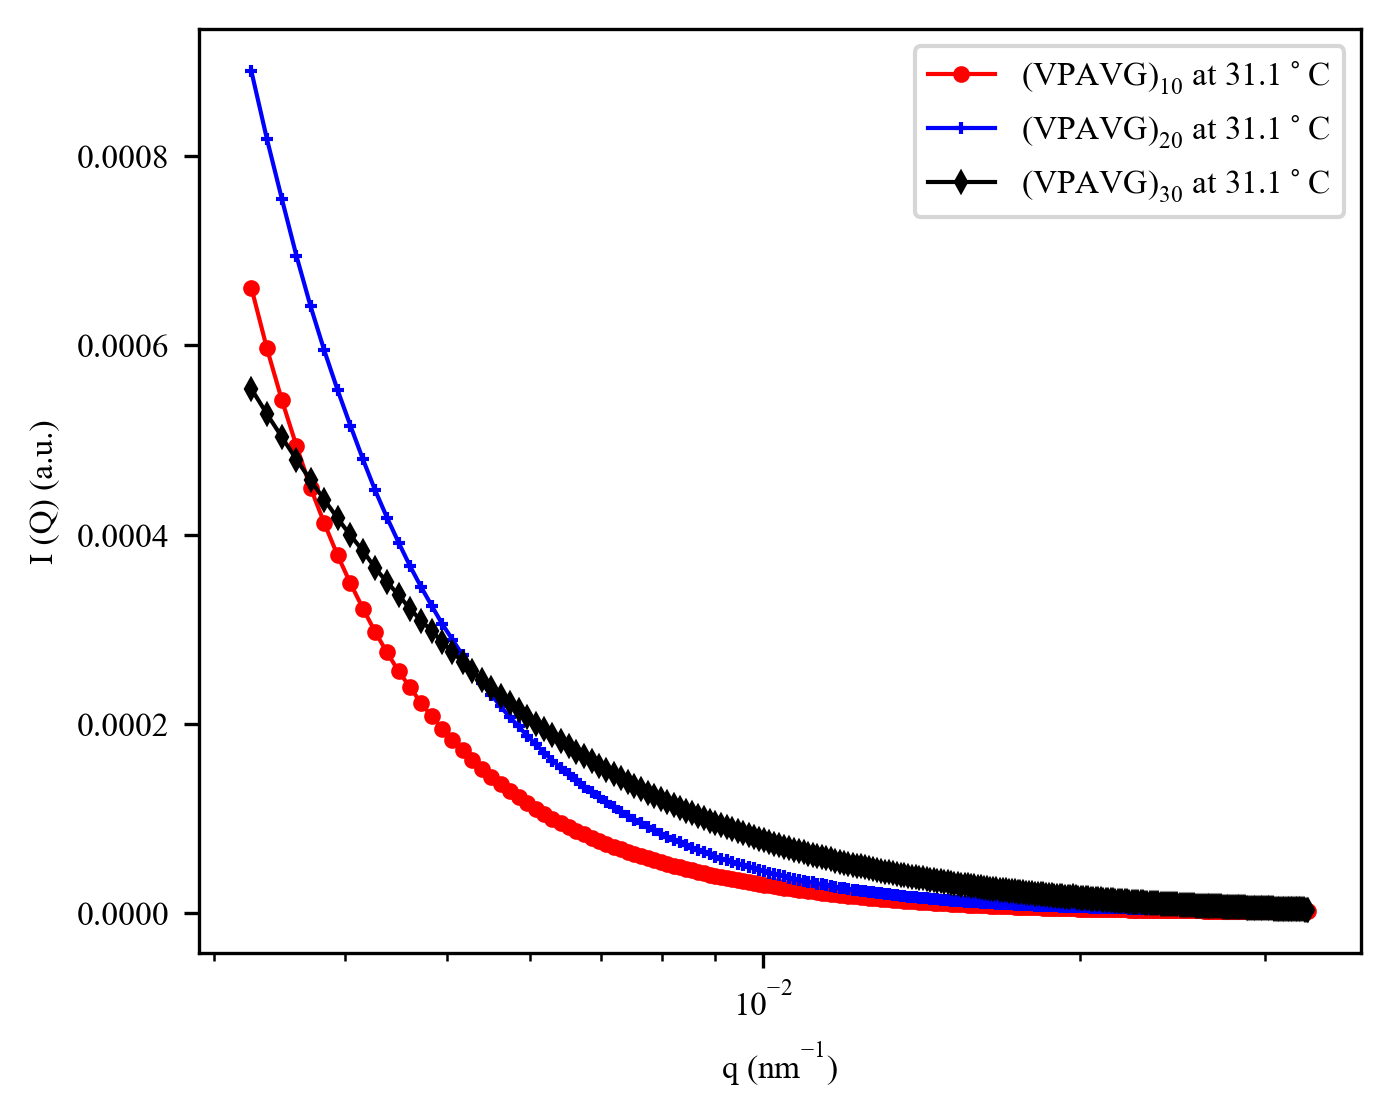

In [7]:

q_crop = 5

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(ql_sta[:-q_crop], saxs_1d_H02[:-q_crop], marker='o', color='r', ms=3, lw=1, 
        label='(VPAVG)$\mathdefault{_{10}}$ at 31.1$^\circ$C')
ax.plot(ql_sta[:-q_crop], saxs_1d_H04[:-q_crop], marker='+', color='b', ms=3, lw=1, 
        label='(VPAVG)$\mathdefault{_{20}}$ at 31.1$^\circ$C')
ax.plot(ql_sta[:-q_crop], saxs_1d_H06[:-q_crop], marker='d', color='k', ms=3, lw=1, 
        label='(VPAVG)$\mathdefault{_{30}}$ at 31.1$^\circ$C')
ax.set_xscale('log')
ax.set_xlabel('q ($\mathdefault{nm^{-1}}$)')
ax.set_ylabel('I (Q) (a.u.)')
plt.legend(loc='upper right')
plt.savefig('SAXS_overlap.pdf', bbox_inches='tight')


